In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# for run R code in jupyter notebook
import os
os.environ['R_HOME'] = "C:/Users/heung/anaconda3/Lib/R"

# to use R in jupyter notebook
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

C:\Users\heung\AppData\Local\Temp\ipykernel_33024\2985131640.py:25: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
c:\Users\heung\anaconda3\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
# read the data
# normal_1 = sc.read("../normalized/normal_1_normalization.h5ad")
# normal_2 = sc.read("../normalized/normal_2_normalization.h5ad")
# normal_3 = sc.read("../normalized/normal_3_normalization.h5ad")
# hiv_1 = sc.read("../normalized/hiv_1_normalization.h5ad")
# hiv_2 = sc.read("../normalized/hiv_2_normalization.h5ad")
# hiv_3 = sc.read("../normalized/hiv_3_normalization.h5ad")

normal_1 = sc.read("../qc_files/normal_1_quality_control.h5ad")
normal_2 = sc.read("../qc_files/normal_2_quality_control.h5ad")
normal_3 = sc.read("../qc_files/normal_3_quality_control.h5ad")
hiv_1 = sc.read("../qc_files/hiv_1_quality_control.h5ad")
hiv_2 = sc.read("../qc_files/hiv_2_quality_control.h5ad")
hiv_3 = sc.read("../qc_files/hiv_3_quality_control.h5ad")

In [3]:
# normalize
for adata in [normal_1, normal_2, normal_3, hiv_1, hiv_2, hiv_3]:
    sc.pp.normalize_total(adata, target_sum=1e4)

In [4]:
# logarithmize the data
for adata in [normal_1, normal_2, normal_3, hiv_1, hiv_2, hiv_3]:
    sc.pp.log1p(adata)

In [5]:
# highly variable genes
for adata in [normal_1, normal_2, normal_3, hiv_1, hiv_2, hiv_3]:
    sc.pp.highly_variable_genes(adata, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)

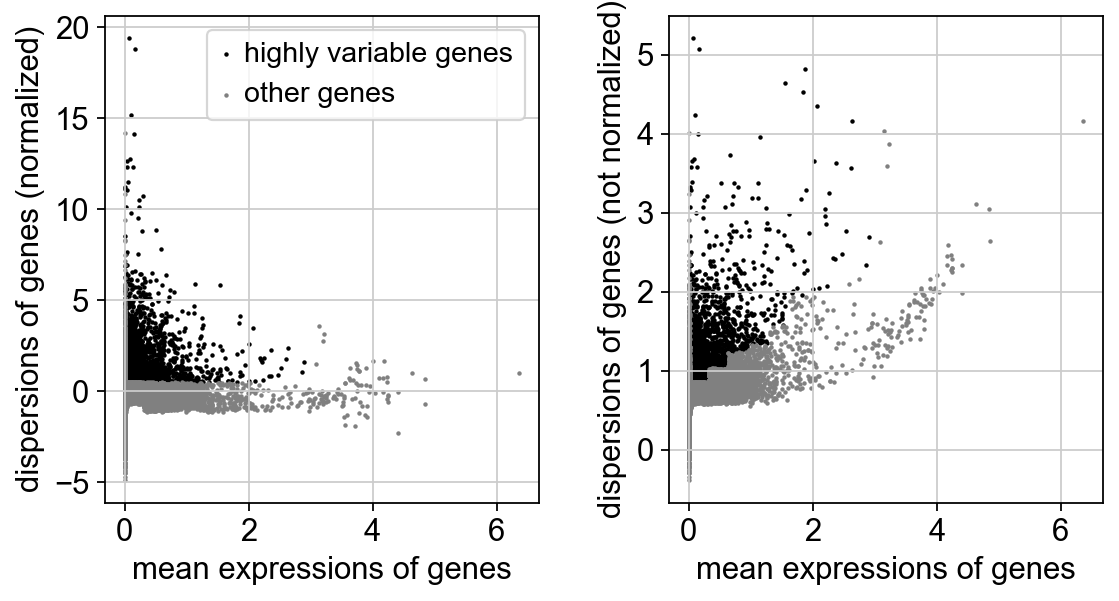

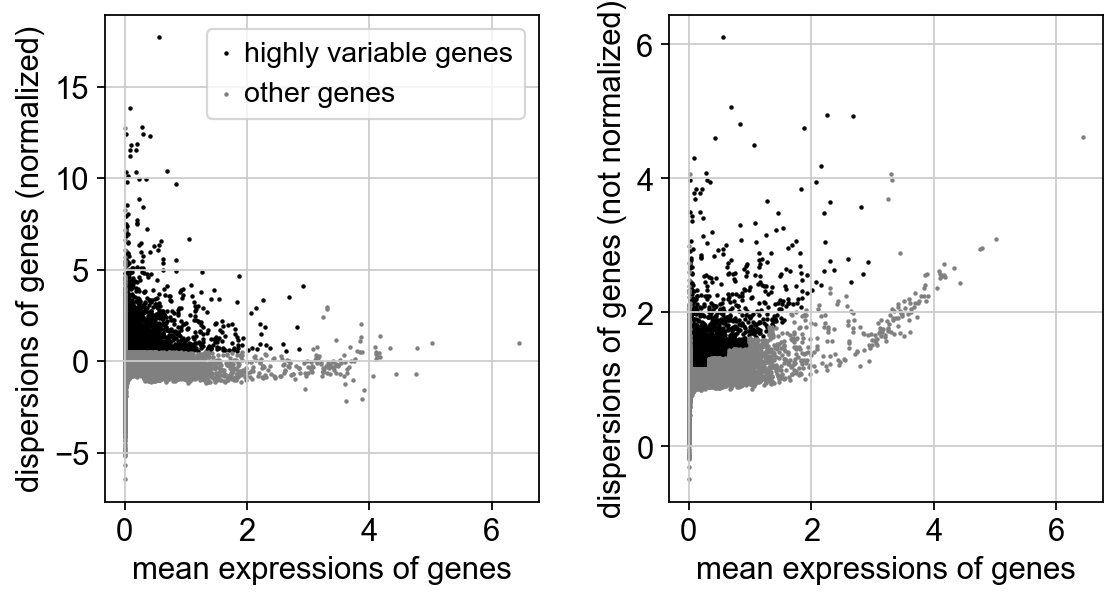

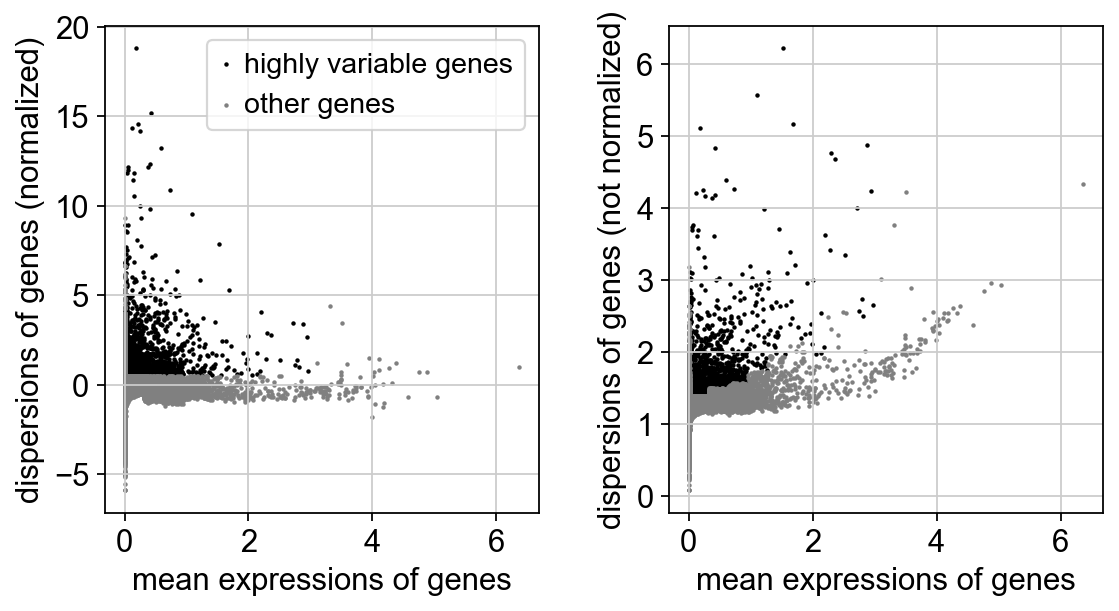

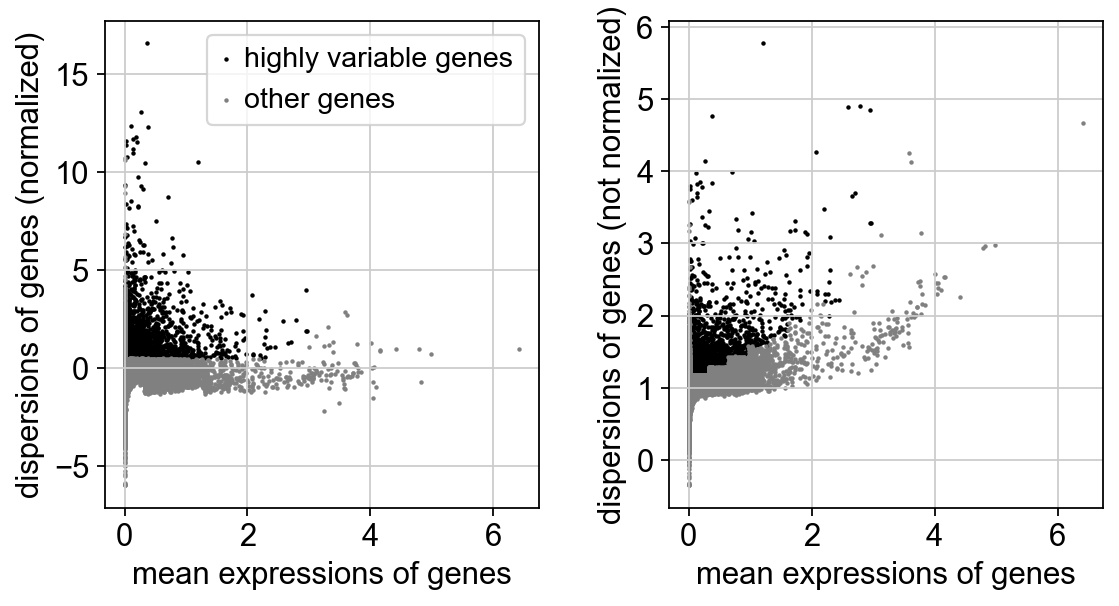

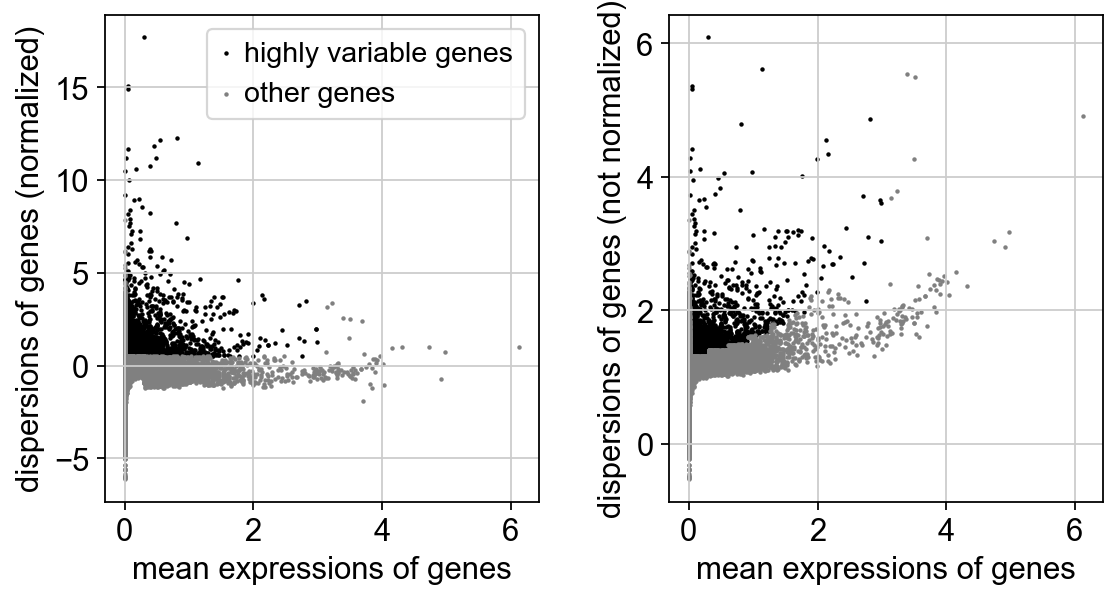

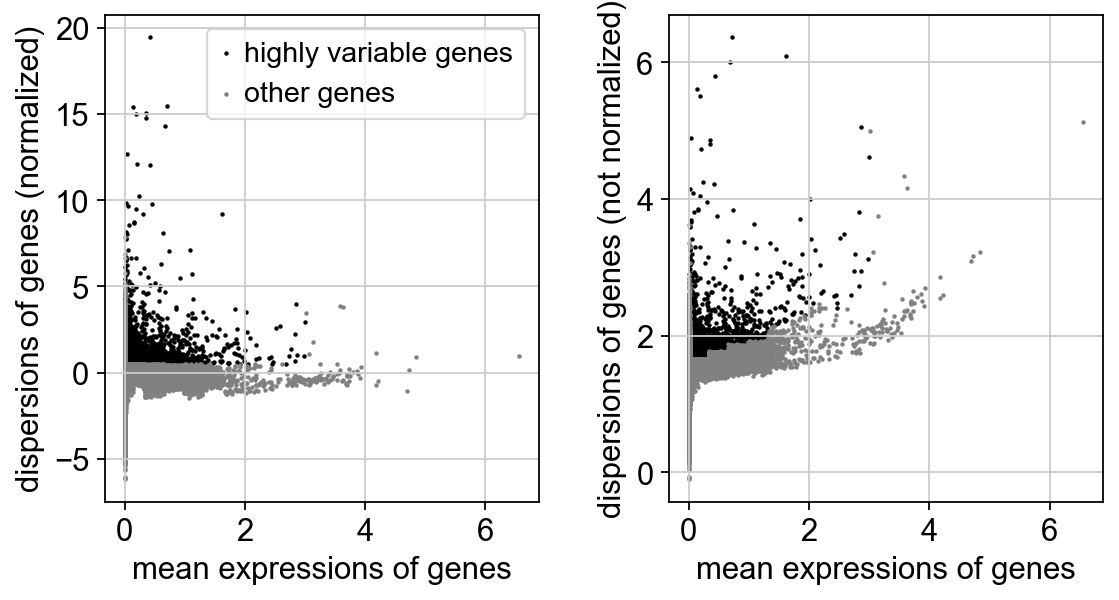

In [6]:
# plot highly variable genes
for adata in [normal_1, normal_2, normal_3, hiv_1, hiv_2, hiv_3]:
    sc.pl.highly_variable_genes(adata)

In [7]:
# set the .raw attribute of AnnData object
normal_1.raw = normal_1
normal_2.raw = normal_2
normal_3.raw = normal_3
hiv_1.raw = hiv_1
hiv_2.raw = hiv_2
hiv_3.raw = hiv_3

# Actual filtering

In [8]:
normal_1

AnnData object with n_obs × n_vars = 9543 × 26986
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_MALAT1', 'log1p_total_counts_MALAT1', 'pct_counts_MALAT1', 'outlier', 'MT_outlier', 'scDblFinder_score', 'scDblFinder_class'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'MT', 'ribo', 'MALAT1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [15]:
# filter the highly variable genes
normal_1 = normal_1[:, normal_1.var.highly_variable]
normal_2 = normal_2[:, normal_2.var.highly_variable]
normal_3 = normal_3[:, normal_3.var.highly_variable]
hiv_1 = hiv_1[:, hiv_1.var.highly_variable]
hiv_2 = hiv_2[:, hiv_2.var.highly_variable]
hiv_3 = hiv_3[:, hiv_3.var.highly_variable]

In [13]:
# filtering doublets
def filter_singlets(adata, column = 'scDblFinder_class', value = 'singlet'):
    if column not in adata.obs.columns:
        raise ValueError(f"Column {column} not in adata.obs.columns")
    
    # filter the anndata object
    filtered_indices = adata.obs[column] == value
    filtered_adata = adata[filtered_indices].copy()
    
    return filtered_adata

normal_1 = filter_singlets(normal_1)
normal_2 = filter_singlets(normal_2)
normal_3 = filter_singlets(normal_3)
hiv_1 = filter_singlets(hiv_1)
hiv_2 = filter_singlets(hiv_2)
hiv_3 = filter_singlets(hiv_3)

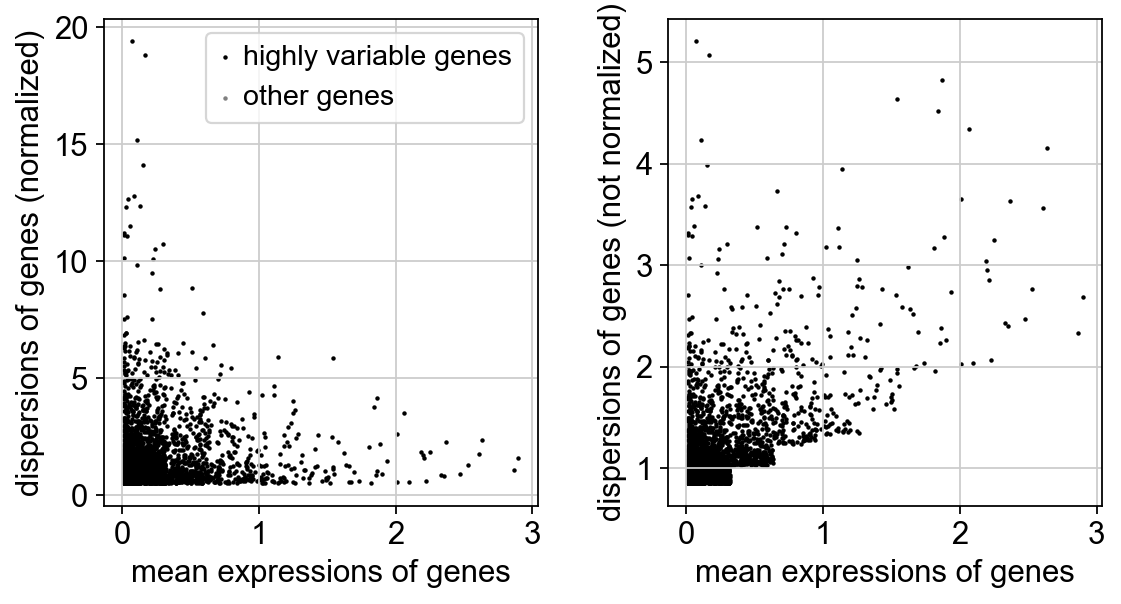

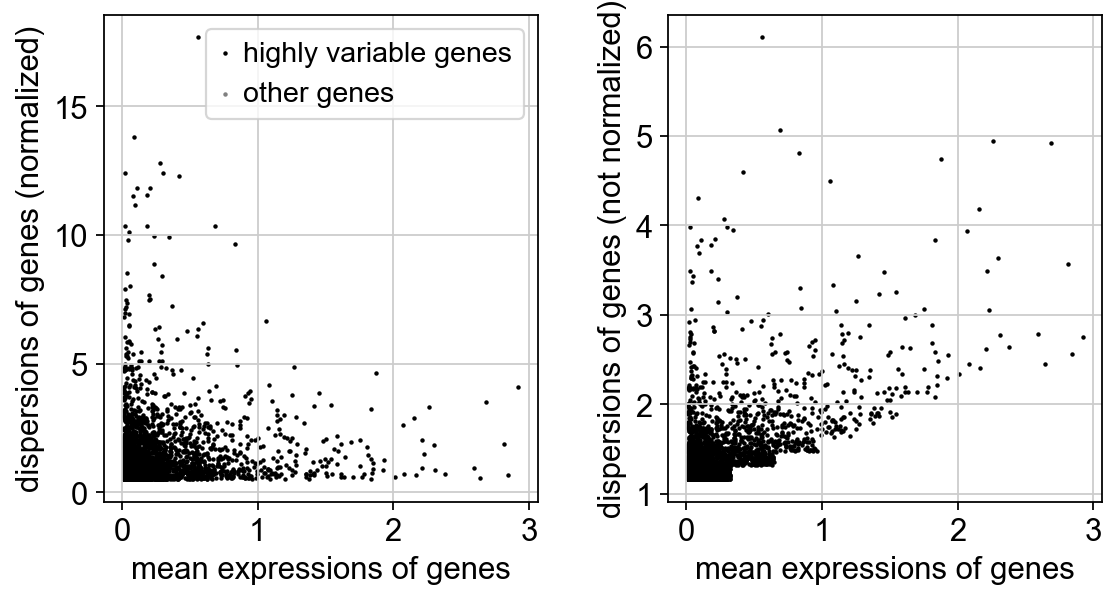

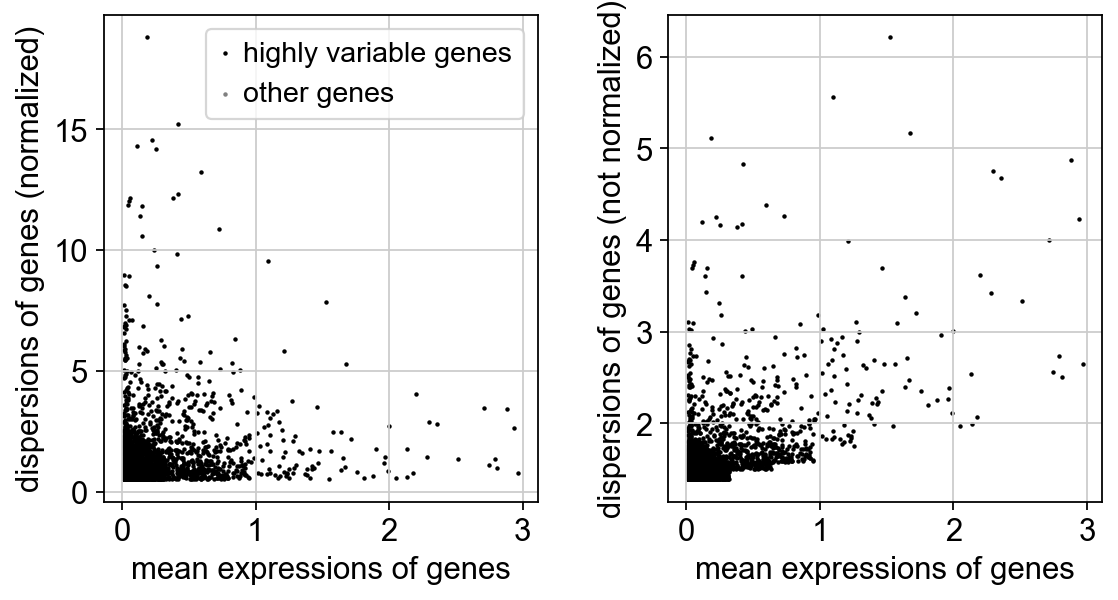

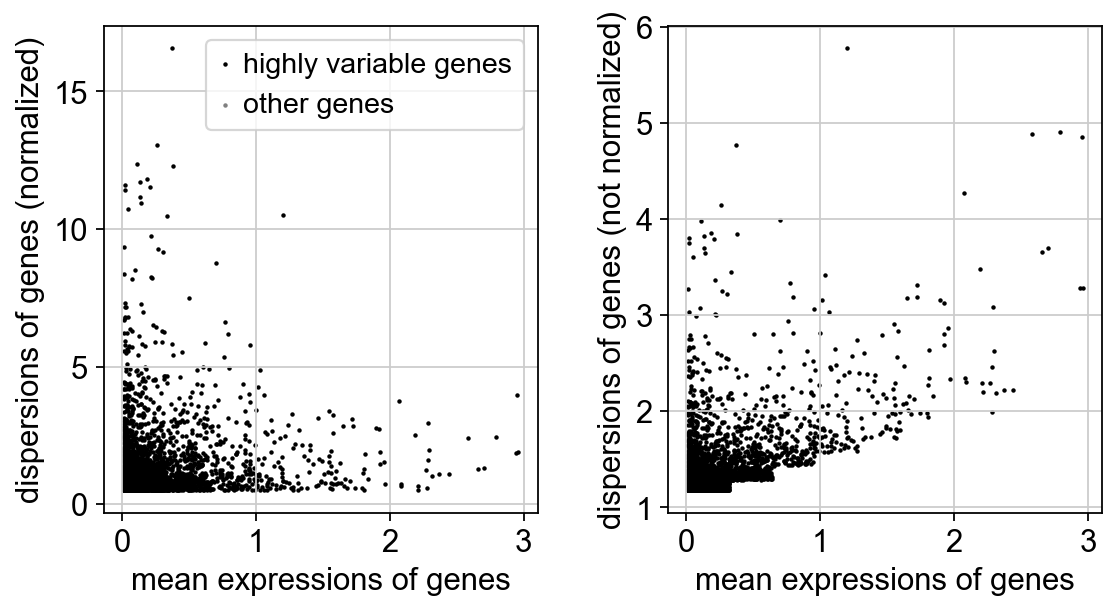

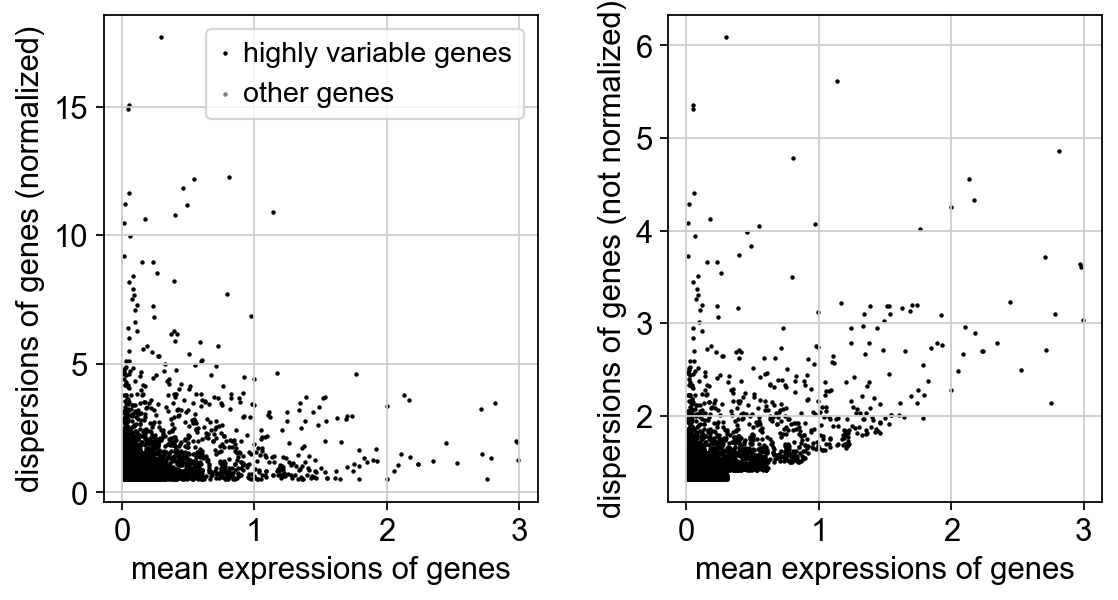

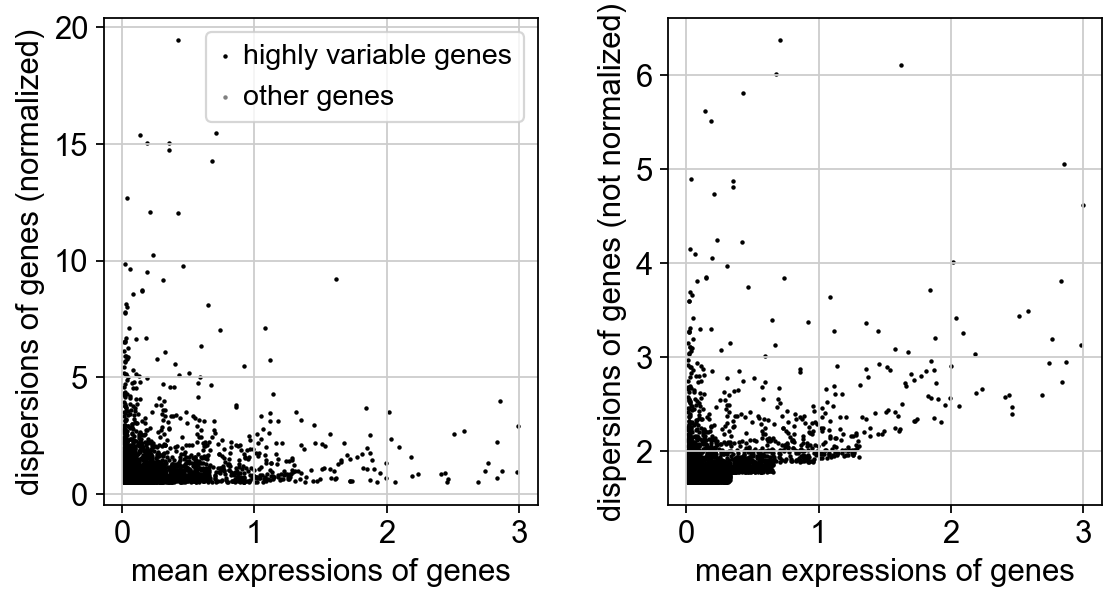

In [16]:
# plot highly variable genes
for adata in [normal_1, normal_2, normal_3, hiv_1, hiv_2, hiv_3]:
    sc.pl.highly_variable_genes(adata)

In [17]:
# save the data
normal_1.write("../normalized/normal_1_normalized.h5ad")
normal_2.write("../normalized/normal_2_normalized.h5ad")
normal_3.write("../normalized/normal_3_normalized.h5ad")
hiv_1.write("../normalized/hiv_1_normalized.h5ad")
hiv_2.write("../normalized/hiv_2_normalized.h5ad")
hiv_3.write("../normalized/hiv_3_normalized.h5ad")